In [ ]:
'''
This is to make comparative contour plots for Gini-M20 (and probs CAS as well)
'''


In [7]:
'''imports a million things'''
import pyfits
import matplotlib.pyplot as plt

import heapq
import pyfits
import matplotlib as plt
from pylab import *
import numpy as np
from decimal import *
import numpy
from scipy.optimize import curve_fit
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from pylab import *
from scipy import stats
from scipy.stats import chisquare
import matplotlib.patches as patches
from astropy.io import fits


from astropy.cosmology import WMAP9 as cosmo

import pyfits
import matplotlib.pyplot as plt

import heapq
import pyfits
import matplotlib as plt
from pylab import *
import numpy as np
from decimal import *
import numpy
from scipy.optimize import curve_fit
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from pylab import *
from scipy import stats
from scipy.stats import chisquare
import matplotlib.patches as patches

import sys 

import numpy as np
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
import matplotlib.pyplot as pp
from scipy.ndimage import iterate_structure

sys.path.append('/usr/local/lib/python2.7/site-packages/ppxf')
sys.path

from __future__ import print_function

from astropy.io import fits
import numpy as np
import glob
from time import clock
from os import path

from ppxf import ppxf
import ppxf_util as util
plt.clf()

from astropy.convolution import convolve, convolve_fft
import matplotlib.pyplot as plt
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import Gaussian1DKernel
from astropy.convolution import convolve

import scipy.ndimage.filters as filters
from scipy import ndimage
from scipy.stats import norm

#os.chdir(os.path.expanduser('~/Documents/LAURA_SIMS'))

import photutils
import os


'''
Step 1 is probably to incorporate the table that has all of your values in it :)
'''


import numpy.ma as ma

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12','fg1_m13']#,'fg1_m13']

run='fg3_m15'
if run=='fg3_m12':
    NAME='q0.5_fg0.3'
if run=='fg1_m13':
    NAME='q0.333_fg0.1'
if run=='fg3_m15':
    NAME='q0.2_fg0.3_BT0.2'
if run=='fg3_m12_noiso':
    NAME='q0.5_fg0.3_noiso'
    run_2='fg3_m12'
if run=='all':
    NAME='ALL'

df = pd.io.parsers.read_table(
    filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
    header=[0],
    sep='\t'
    )#,skiprows=10,nrows=10
#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
    
df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']


df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
'''for j in range(len(df)):
    if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]


        #I use this part to check if there is any separation at these points in time
        #Or if there are more than two bulges
        #print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])

        #Then, you can optionally change the class values of all of these viewpoints

        #.set_value(index, col, value, 
        df.set_value(j,'class label',0.0)'''
'''df.dropna(inplace=True)#keep df with valid entries by same name
print('df after reassigning zeros', df)
'''
from sklearn.preprocessing import LabelEncoder


X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)', 'Sersic N', 'Shape Asymmetry']].values

from sklearn import preprocessing



std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X)

n_params=7


y = df['class label'].values


enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1


label_dict = {1: 'NonMerger', 2: 'Merger'}

'''
Okay after reading in the table plot contours of the values 
from all of the mergers and nonmergers
Or just the scatter plot
'''

if run=='fg3_m15' or run=='fg3_m15_noiso':
    myr=[5,30,60,100,150,180,200,210,240,270,300,320,340,360,400,420]
    myr_non=myr#[5,100,200]
if run=='fg3_m12':
    myr=[5,10,20,30,40,60,80,100,120,140,160,170,180,185,190,195,205,210,220,225,230,240,250,260]
    myr_non=[5,100,200]
    myr_non=[5,10,20,30,100,200]
    myr_non=[5,10,20,30,40,60,80,100,120,140,160,170,180,185,190,195,200,205,210,220,225,230,240,250,260]
    
if run=='fg3_m12_noiso':
    myr=[5,10,20,30,40,60,80,100,120,140,160,170,180,185,190,195,205,210,220,225,230,240,250,260]
    
    myr_non=[5,10,20,30,40,60,80,100,120,140,160,170,180,185,190,195,200,205,210,220,225,230,240,250,260]
    #myr_non=[5,100,200]
    #myr_non=[5,10,20,30,100,200]
if run=='fg1_m13':
    myr=[10,40,50,60,70,90,100,120,130,140,170,180,185,190,195,200,205,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
    myr_non=[5,10,100,200]
if run=='fg1_m13_noiso':
    myr=[10,40,50,60,70,90,100,120,130,140,170,180,185,190,195,200,205,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
    myr_non=[10,40,50,60,70,90,100,120,130,140,170,180,185,190,195,200,205,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
if run=='all':
    myr=[5,10,20,30,40,50,60,70,80,90,100,120,130,140,160,170,180,185,190,195,200,205,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350, 360, 400, 420]
    myr_non=myr
    

views=[0,1,2,3,4,5,6]
gini = {key:[] for key in myr}
m20 = {key:[] for key in myr}

C = {key:[] for key in myr}
A = {key:[] for key in myr}
S = {key:[] for key in myr}

gini_non = {key:[] for key in myr_non}
m20_non = {key:[] for key in myr_non}

C_non = {key:[] for key in myr_non}
A_non = {key:[] for key in myr_non}
S_non = {key:[] for key in myr_non}




for i in range(len(df)):
    if df[['class label']].values[i]==0:
        gini_non[df[['Myr']].values[i][0]].append(df[['Gini']].values[i][0])
        m20_non[df[['Myr']].values[i][0]].append(df[['M20']].values[i][0])
        C_non[df[['Myr']].values[i][0]].append(df[['Concentration (C)']].values[i][0])
        A_non[df[['Myr']].values[i][0]].append(df[['Asymmetry (A)']].values[i][0])
        S_non[df[['Myr']].values[i][0]].append(df[['Clumpiness (S)']].values[i][0])
        #print('concentration here', df[['Concentration (C)']].values[i][0])
    else:
        gini[df[['Myr']].values[i][0]].append(df[['Gini']].values[i][0])
        m20[df[['Myr']].values[i][0]].append(df[['M20']].values[i][0])
        C[df[['Myr']].values[i][0]].append(df[['Concentration (C)']].values[i][0])
        A[df[['Myr']].values[i][0]].append(df[['Asymmetry (A)']].values[i][0])
        S[df[['Myr']].values[i][0]].append(df[['Clumpiness (S)']].values[i][0])
        
    
print('these are the nonmerger Ss',S_non)
print('~~~~Lets investigate by Myr~~~~')
for j in range(len(myr_non)):
    print('Myr',myr_non[j],np.mean(S_non[myr_non[j]]))
print('~~~~Lets investigate by Viewpoint~~~~')
print(np.shape(S_non))

for k in range(6):
    S_list=[]
    for j in range(len(myr_non)):
        try:
            S_list.append(S_non[myr_non[j]][k])
        except IndexError:
            continue
        
            
    print('View',k,np.mean(S_list))



    
'''Make the beautiful list of colors'''
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    


dashed_line_x=np.linspace(-0.5,-3,100)
dashed_line_y=[-0.14*x + 0.33 for x in dashed_line_x]

import seaborn

plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)
ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')

G_list_all=[]
M20_list_all=[]
color_list_all=[]

for k in range(len(gini)):
    for z in range(len(gini[myr[k]])):
        M20_list_all.append(m20[myr[k]][z])
        G_list_all.append(gini[myr[k]][z])
        color_list_all.append(myr[k]/100)
    #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)
im1=ax1.scatter(M20_list_all, G_list_all, c=color_list_all, cmap='Reds')
plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

ax1.set_xlim([0,-3])
ax1.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'M$_{20}$')
ax1.set_ylabel(r'Gini')
ax1.set_aspect(abs(3)/abs(0.6))



ax1.set_title('Mergers', loc='right')
ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)



ax2=fig.add_subplot(122)
ax2.plot(dashed_line_x, dashed_line_y, ls='--', color='black')

G_list_all=[]
M20_list_all=[]
color_list_all=[]

for k in range(len(gini_non)):
    for z in range(len(gini_non[myr_non[k]])):
        M20_list_all.append(m20_non[myr_non[k]][z])
        G_list_all.append(gini_non[myr_non[k]][z])
        color_list_all.append(myr_non[k]/100)
    #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)
im1=ax2.scatter(M20_list_all, G_list_all, c=color_list_all, cmap='Blues')
plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

ax2.set_xlim([0,-3])
ax2.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'M$_{20}$')
ax2.set_ylabel(r'Gini')
ax2.set_aspect(abs(3)/abs(0.6))


ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
savefig('../MaNGA_Papers/Paper_I/gini_m20_cont_statmorph_'+str(run)+'.pdf')



'''

Now for C-A plot

'''
plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)



A_list_all=[]
C_list_all=[]
S_list_all=[]
color_list_all=[]

for k in range(len(A)):
    for z in range(len(A[myr[k]])):
        A_list_all.append(A[myr[k]][z])
        C_list_all.append(C[myr[k]][z])
        S_list_all.append(S[myr[k]][z])
        color_list_all.append(myr[k]/100)
    #plt.contour(A_non[myr_non[k]],C_non[myr_non[k]])
    #ax2.scatter(A_non[myr_non[k]],C_non[myr_non[k]],color=tableau20[k], label=myr_non[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)

im1=ax1.scatter(A_list_all, C_list_all, c=color_list_all, cmap='Reds')
plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)

ax1.set_xlim([0,1])
ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'A')
ax1.set_ylabel(r'C')
ax1.set_aspect(1/6)

#ax1.legend(loc='lower center',
#          ncol=2)
ax1.set_title('Mergers', loc='right')

ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
plt.axvline(x=0.35, ls='--', color='black')


ax2=fig.add_subplot(122)

A_list_all=[]
C_list_all=[]
S_list_all=[]
color_list_all=[]

for k in range(len(m20_non)):
    for z in range(len(A_non[myr_non[k]])):
        A_list_all.append(A_non[myr_non[k]][z])
        C_list_all.append(C_non[myr_non[k]][z])
        S_list_all.append(S_non[myr_non[k]][z])
        color_list_all.append(myr_non[k]/100)
    #plt.contour(A_non[myr_non[k]],C_non[myr_non[k]])
    #ax2.scatter(A_non[myr_non[k]],C_non[myr_non[k]],color=tableau20[k], label=myr_non[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)

im1=ax2.scatter(A_list_all, C_list_all, c=color_list_all, cmap='Blues')
plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

ax2.set_xlim([0,1])
ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'A')
ax2.set_ylabel(r'C')
ax2.set_aspect(1/6)
plt.axvline(x=0.35, ls='--', color='black')


#ax2.legend(loc='lower center',
#          ncol=2)
ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
savefig('../MaNGA_Papers/Paper_I/C_A_cont_statmorph_'+str(run)+'.pdf')



'''

Now for S-A plot

'''
plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)



A_list_all=[]
C_list_all=[]
S_list_all=[]
color_list_all=[]

for k in range(len(A)):
    for z in range(len(A[myr[k]])):
        A_list_all.append(A[myr[k]][z])
        C_list_all.append(C[myr[k]][z])
        S_list_all.append(S[myr[k]][z])
        color_list_all.append(myr[k]/100)

im1=ax1.scatter(A_list_all, S_list_all, c=color_list_all, cmap='Reds')
plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')


ax1.set_xlim([0,1])
ax1.set_ylim([0,0.5])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'A')
ax1.set_ylabel(r'S')
ax1.set_aspect(2/1)

#ax1.legend(loc='lower center',
#          ncol=2)
ax1.set_title('Mergers', loc='right')

ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
plt.axvline(x=0.35, ls='--', color='black')


ax2=fig.add_subplot(122)


A_list_all=[]
C_list_all=[]
S_list_all=[]
color_list_all=[]

for k in range(len(m20_non)):
    for z in range(len(A_non[myr_non[k]])):
        A_list_all.append(A_non[myr_non[k]][z])
        C_list_all.append(C_non[myr_non[k]][z])
        S_list_all.append(S_non[myr_non[k]][z])
        color_list_all.append(myr_non[k]/100)


im1=ax2.scatter(A_list_all, S_list_all, c=color_list_all, cmap='Blues')
plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

ax2.set_xlim([0,1])
ax2.set_ylim([0,0.5])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'A')
ax2.set_ylabel(r'S')
ax2.set_aspect(2/1)
plt.axvline(x=0.35, ls='--', color='black')


#ax2.legend(loc='lower center',
#          ncol=2)
ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
savefig('../MaNGA_Papers/Paper_I/S_A_cont_statmorph_'+str(run)+'.pdf')


plt.clf()
fig=plt.figure()
ax2=fig.add_subplot(111)


A_list_all=[]
C_list_all=[]
S_list_all=[]
color_list_all=[]

for k in range(len(m20_non)):
    for z in range(len(A_non[myr_non[k]])):
        A_list_all.append(A_non[myr_non[k]][z])
        C_list_all.append(C_non[myr_non[k]][z])
        S_list_all.append(S_non[myr_non[k]][z])
        color_list_all.append(myr_non[k]/100)

import seaborn as sns
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.dark_palette('palegreen').as_hex())
#sns.dark_palette("palegreen"
im1=ax2.scatter(A_list_all, S_list_all, c=color_list_all, cmap=my_cmap,vmin=0,vmax=2)
plt.colorbar(im1, label='Time [Gyr]',orientation='vertical')

ax2.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)


ax2.set_xlim([0,1])
ax2.set_ylim([0,0.5])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'A')
ax2.set_ylabel(r'S')
ax2.set_aspect(2/1)
plt.axvline(x=0.35, ls='--', color='black')


#ax2.legend(loc='lower center',
#          ncol=2)
ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
savefig('../MaNGA_Papers/Paper_I/S_A_non_cont_statmorph_'+str(run)+'_noiso.pdf')









these are the nonmerger Ss {5: [], 30: [0.06236435966926405, 0.06869482710445883, 0.07292381206109776, 0.07347769111023192, 0.06154066923154693, 0.06450954343587975, 0.060247026764405576], 60: [0.06628690195168215, 0.07034847560046396, 0.06972285351067142, 0.07099402418972846, 0.0483207339264498, 0.049634151992577064, 0.05307683418263052], 100: [0.08549489654309299, 0.0812130450483932, 0.08055521010857812, 0.07527173816376907, 0.062140646818469536, 0.06311909290215005, 0.05613717690121276], 150: [], 180: [], 200: [0.07037863787506103, 0.07007997370577447, 0.06729676622131013, 0.0685211581468216, 0.06337149610549721, 0.05217379539805532, 0.05315015551694845], 210: [], 240: [], 270: [], 300: [], 320: [], 340: [], 360: [], 400: [], 420: []}
~~~~Lets investigate by Myr~~~~
Myr 5 nan
Myr 30 0.0662511327681264
Myr 60 0.06119771076488619
Myr 100 0.07199025806938082
Myr 150 nan
Myr 180 nan
Myr 200 0.06356742613849546
Myr 210 nan
Myr 240 nan
Myr 270 nan
Myr 300 

/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan
Myr 320 nan
Myr 340 nan
Myr 360 nan
Myr 400 nan
Myr 420 nan
~~~~Lets investigate by Viewpoint~~~~
()
View 0 0.07113119900977506
View 1 0.07258408036477261
View 2 0.07262466047541437
View 3 0.07206615290263776
View 4 0.05884338652049087
View 5 0.05735914593216555


/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [159]:
'''I also want to split up into Gyr progressions and plot'''

plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)



A_list_all=[]
C_list_all=[]
S_list_all=[]
color_list_all=[]

S_50=[]
S_100=[]
S_150=[]
S_200=[]
S_250=[]

A_50=[]
A_100=[]
A_150=[]
A_200=[]
A_250=[]

for k in range(len(A)):
    for z in range(len(A[myr[k]])):
        A_list_all.append(A[myr[k]][z])
        C_list_all.append(C[myr[k]][z])
        S_list_all.append(S[myr[k]][z])
        color_list_all.append(myr[k]/100)
        if myr[k] < 75 and myr[k]>0:
            S_50.append(S[myr[k]][z])
            A_50.append(A[myr[k]][z])
        if myr[k] > 75 and myr[k] < 125:
            S_100.append(S[myr[k]][z])
            A_100.append(A[myr[k]][z])
        if myr[k] > 125 and myr[k] < 175:
            S_150.append(S[myr[k]][z])
            A_150.append(A[myr[k]][z])
        if myr[k] > 175 and myr[k] < 225:
            S_200.append(S[myr[k]][z])
            A_200.append(A[myr[k]][z])
        if myr[k] > 225 and myr[k] < 275:
            S_250.append(S[myr[k]][z])
            A_250.append(A[myr[k]][z])
        if myr[k] > 275:
            print('OMG gt 275', myr[k])
            
            

#im1=ax1.scatter(A_list_all, S_list_all, c=color_list_all, cmap='Reds')
annotate_list=[0.5,1,1.5,2,2.5]
mean_list_A=[np.mean(A_50),np.mean(A_100),np.mean(A_150),np.mean(A_200),np.mean(A_250)]
mean_list_S=[np.mean(S_50),np.mean(S_100),np.mean(S_150),np.mean(S_200),np.mean(S_250)]
#ax1.plot(mean_list_A, mean_list_S, color='black')

im1=ax1.scatter(mean_list_A, mean_list_S, c=annotate_list, cmap='Reds', s=100, zorder=100)

    
style="Simple,tail_width=0.5,head_width=4,head_length=8"
kw = dict(arrowstyle=style, color="k")

#a1 = patches.FancyArrowPatch((-0.4,-0.6), (0,0.6),**kw )
#a2 = patches.FancyArrowPatch((0,0.6), (0.4,-0.6),**kw)
#a3 = patches.FancyArrowPatch((-0.4,-0.6), (0.4,-0.6),connectionstyle="arc3,rad=.5", **kw)
a_list=[]
for j in range(len(annotate_list)-1):
    a=patches.FancyArrowPatch((mean_list_A[j],mean_list_S[j]),(mean_list_A[j+1],mean_list_S[j+1]),**kw)
    plt.gca().add_patch(a)
    

for j in range(len(annotate_list)):
    ax1.annotate(str(annotate_list[j]), xy=(mean_list_A[j],mean_list_S[j]), color='black', zorder=150,
                 horizontalalignment='left',
            verticalalignment='top')
'''for j in range(len(annotate_list)-1):
    ax1.annotate(str(annotate_list[j]),
            xy=(mean_list_A[j+1],mean_list_S[j+1]), xycoords='data',
            xytext=(mean_list_A[j],mean_list_S[j]), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )'''
plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')


ax1.set_xlim([0,0.6])
ax1.set_ylim([0,0.3])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'A')
ax1.set_ylabel(r'S')
ax1.set_aspect(2/1)

#ax1.legend(loc='lower center',
#          ncol=2)
ax1.set_title('Mergers', loc='right')

ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
plt.axvline(x=0.35, ls='--', color='black')


ax2=fig.add_subplot(122)


A_list_all=[]
C_list_all=[]
S_list_all=[]
color_list_all=[]
S_50=[]
S_100=[]
S_150=[]
S_200=[]
S_250=[]

A_50=[]
A_100=[]
A_150=[]
A_200=[]
A_250=[]

for k in range(len(m20_non)):
    for z in range(len(A_non[myr_non[k]])):
        A_list_all.append(A_non[myr_non[k]][z])
        C_list_all.append(C_non[myr_non[k]][z])
        S_list_all.append(S_non[myr_non[k]][z])
        color_list_all.append(myr_non[k]/100)
        if myr_non[k] < 75 and myr_non[k]>0:
            S_50.append(S_non[myr_non[k]][z])
            A_50.append(A_non[myr_non[k]][z])
        if myr_non[k] > 75 and myr_non[k] < 125:
            S_100.append(S_non[myr_non[k]][z])
            A_100.append(A_non[myr_non[k]][z])
        if myr_non[k] > 125 and myr_non[k] < 175:
            S_150.append(S_non[myr_non[k]][z])
            A_150.append(A_non[myr_non[k]][z])
        if myr_non[k] > 175 and myr_non[k] < 225:
            S_200.append(S_non[myr_non[k]][z])
            A_200.append(A_non[myr_non[k]][z])
        if myr_non[k] > 225 and myr_non[k] < 275:
            S_250.append(S_non[myr_non[k]][z])
            A_250.append(A_non[myr_non[k]][z])
        if myr_non[k] > 275:
            print('OMG gt 275', myr_non[k])
            
            

#im1=ax1.scatter(A_list_all, S_list_all, c=color_list_all, cmap='Reds')

annotate_list=[0.5,1,1.5,2,2.5]
mean_list_A=[np.mean(A_50),np.mean(A_100),np.mean(A_150),np.mean(A_200),np.mean(A_250)]
mean_list_S=[np.mean(S_50),np.mean(S_100),np.mean(S_150),np.mean(S_200),np.mean(S_250)]
im1=ax2.scatter(mean_list_A, mean_list_S, c=annotate_list, cmap='Blues', s=100)

a_list=[]
'''for j in range(len(annotate_list)-1):
    a=patches.FancyArrowPatch((mean_list_A[j],mean_list_S[j]),(mean_list_A[j+1],mean_list_S[j+1]),**kw)
    plt.gca().add_patch(a)'''
    

for j in range(len(annotate_list)):
    ax2.annotate(str(annotate_list[j]), xy=(mean_list_A[j],mean_list_S[j]),horizontalalignment='center',
            verticalalignment='center', color='black')
'''for j in range(len(annotate_list)-1):
    ax2.annotate(str(annotate_list[j]),
            xy=(mean_list_A[j+1],mean_list_S[j+1]), xycoords='data',
            xytext=(mean_list_A[j],mean_list_S[j]), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )'''

#im1=ax2.scatter(A_list_all, S_list_all, c=color_list_all, cmap='Blues')
plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

ax2.set_xlim([0,0.6])
ax2.set_ylim([0,0.3])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'A')
ax2.set_ylabel(r'S')
ax2.set_aspect(2/1)
plt.axvline(x=0.35, ls='--', color='black')


#ax2.legend(loc='lower center',
#          ncol=2)
ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
#plt.show()
savefig('../MaNGA_Papers/Paper_I/S_A_numbered_statmorph_'+str(run)+'.pdf')

/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [4]:
'''
I also want to sort by viewpoint (and MYR) is this even possible
'''

'''imports a million things'''
import pyfits
import matplotlib.pyplot as plt

import heapq
import pyfits
import matplotlib as plt
from pylab import *
import numpy as np
from decimal import *
import numpy
from scipy.optimize import curve_fit
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from pylab import *
from scipy import stats
from scipy.stats import chisquare
import matplotlib.patches as patches
from astropy.io import fits


from astropy.cosmology import WMAP9 as cosmo

import pyfits
import matplotlib.pyplot as plt

import heapq
import pyfits
import matplotlib as plt
from pylab import *
import numpy as np
from decimal import *
import numpy
from scipy.optimize import curve_fit
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from pylab import *
from scipy import stats
from scipy.stats import chisquare
import matplotlib.patches as patches

import sys 

import numpy as np
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
import matplotlib.pyplot as pp
from scipy.ndimage import iterate_structure

sys.path.append('/usr/local/lib/python2.7/site-packages/ppxf')
sys.path

from __future__ import print_function

from astropy.io import fits
import numpy as np
import glob
from time import clock
from os import path

from ppxf import ppxf
import ppxf_util as util
plt.clf()

from astropy.convolution import convolve, convolve_fft
import matplotlib.pyplot as plt
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import Gaussian1DKernel
from astropy.convolution import convolve

import scipy.ndimage.filters as filters
from scipy import ndimage
from scipy.stats import norm

#os.chdir(os.path.expanduser('~/Documents/LAURA_SIMS'))

import photutils
import os


'''
Step 1 is probably to incorporate the table that has all of your values in it :)
'''


import numpy.ma as ma

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12','fg1_m13']#,'fg1_m13']

run='fg3_m15'#'all'
if run=='fg3_m12':
    NAME='q0.5_fg0.3'
if run=='fg1_m13':
    NAME='q0.333_fg0.1'
if run=='fg3_m15':
    NAME='q0.2_fg0.3_BT0.2'
if run=='fg3_m12_noiso':
    NAME='q0.5_fg0.3_noiso'
    run_2='fg3_m12'
if run=='all':
    NAME='ALL'

df = pd.io.parsers.read_table(
    filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
    header=[0],
    sep='\t'
    )#,skiprows=10,nrows=10
#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
    
df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']


df.dropna(how="all", inplace=True) # to drop the empty line at file-end

for j in range(len(df)):
    if run=='fg3_m15':
        if df[['Myr']].values[j][0]<60 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]

            df.set_value(j,'class label',0.0)
    else:
        if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]
        #was < 40

        #I use this part to check if there is any separation at these points in time
        #Or if there are more than two bulges
        #print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])

        #Then, you can optionally change the class values of all of these viewpoints

        #.set_value(index, col, value, 
            df.set_value(j,'class label',0.0)

    
'''
'''
'''df.dropna(inplace=True)#keep df with valid entries by same name
print('df after reassigning zeros', df)
'''
from sklearn.preprocessing import LabelEncoder


X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Sersic N', 'Shape Asymmetry']].values

from sklearn import preprocessing



std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X)

n_params=6


y = df['class label'].values


enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1


label_dict = {1: 'NonMerger', 2: 'Merger'}

'''
Okay after reading in the table plot contours of the values 
from all of the mergers and nonmergers
Or just the scatter plot
'''

if run=='fg3_m15' or run=='fg3_m15_noiso':
    myr=[5,30,60,100,120,150,180,200,210,240,270,300,320,340,360,400,420]
    myr_non=myr#[5,100,200]
if run=='fg3_m12':
    myr=[5,10,20,30,40,60,80,100,120,140,160,170,180,185,190,195,205,210,220,225,230,240,250,260]
    myr_non=[5,100,200]
    myr_non=[5,10,20,30,100,200]
    myr_non=[5,10,20,30,40,60,80,100,120,140,160,170,180,185,190,195,200,205,210,220,225,230,240,250,260]
    
if run=='fg3_m12_noiso':
    myr=[5,10,20,30,40,60,80,100,120,140,160,170,180,185,190,195,205,210,220,225,230,240,250,260]
    
    myr_non=[5,10,20,30,40,60,80,100,120,140,160,170,180,185,190,195,200,205,210,220,225,230,240,250,260]
    #myr_non=[5,100,200]
    #myr_non=[5,10,20,30,100,200]
if run=='fg1_m13':
    myr=[10,40,50,60,70,90,100,120,130,140,170,180,185,190,195,200,205,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
    myr_non=[5,10,100,200]
if run=='fg1_m13_noiso':
    myr=[10,40,50,60,70,90,100,120,130,140,170,180,185,190,195,200,205,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
    myr_non=[10,40,50,60,70,90,100,120,130,140,170,180,185,190,195,200,205,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350]
if run=='all':
    myr=[5,10,20,30,40,50,60,70,80,90,100,120,130,140,160,170,180,185,190,195,200,205,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350, 360, 400, 420]
    myr_non=myr
    

views=[0,1,2,3,4,5,6]

gini = {key:[] for key in myr}
m20 = {key:[] for key in myr}

C = {key:[] for key in myr}
A = {key:[] for key in myr}
S = {key:[] for key in myr}

gini_non = {key:[] for key in myr_non}
m20_non = {key:[] for key in myr_non}

C_non = {key:[] for key in myr_non}
A_non = {key:[] for key in myr_non}
S_non = {key:[] for key in myr_non}

gini_v = {key:[] for key in views}
m20_v = {key:[] for key in views}

C_v = {key:[] for key in views}
A_v = {key:[] for key in views}
S_v = {key:[] for key in views}

gini_non_v = {key:[] for key in views}
m20_non_v = {key:[] for key in views}

C_non_v = {key:[] for key in views}
A_non_v = {key:[] for key in views}
S_non_v = {key:[] for key in views}




for i in range(len(df)):
    if df[['class label']].values[i]==0:
        gini_non[df[['Myr']].values[i][0]].append(df[['Gini']].values[i][0])
        m20_non[df[['Myr']].values[i][0]].append(df[['M20']].values[i][0])
        C_non[df[['Myr']].values[i][0]].append(df[['Concentration (C)']].values[i][0])
        A_non[df[['Myr']].values[i][0]].append(df[['Asymmetry (A)']].values[i][0])
        S_non[df[['Myr']].values[i][0]].append(df[['Clumpiness (S)']].values[i][0])
        #print('concentration here', df[['Concentration (C)']].values[i][0])
    else:
        gini[df[['Myr']].values[i][0]].append(df[['Gini']].values[i][0])
        m20[df[['Myr']].values[i][0]].append(df[['M20']].values[i][0])
        C[df[['Myr']].values[i][0]].append(df[['Concentration (C)']].values[i][0])
        A[df[['Myr']].values[i][0]].append(df[['Asymmetry (A)']].values[i][0])
        S[df[['Myr']].values[i][0]].append(df[['Clumpiness (S)']].values[i][0])

        
for i in range(len(df)):
    if df[['class label']].values[i]==0:
        gini_non_v[df[['Viewpoint']].values[i][0]].append(df[['Gini']].values[i][0])
        m20_non_v[df[['Viewpoint']].values[i][0]].append(df[['M20']].values[i][0])
        C_non_v[df[['Viewpoint']].values[i][0]].append(df[['Concentration (C)']].values[i][0])
        A_non_v[df[['Viewpoint']].values[i][0]].append(df[['Asymmetry (A)']].values[i][0])
        S_non_v[df[['Viewpoint']].values[i][0]].append(df[['Clumpiness (S)']].values[i][0])
        #print('concentration here', df[['Concentration (C)']].values[i][0])
    else:
        gini_v[df[['Viewpoint']].values[i][0]].append(df[['Gini']].values[i][0])
        m20_v[df[['Viewpoint']].values[i][0]].append(df[['M20']].values[i][0])
        C_v[df[['Viewpoint']].values[i][0]].append(df[['Concentration (C)']].values[i][0])
        A_v[df[['Viewpoint']].values[i][0]].append(df[['Asymmetry (A)']].values[i][0])
        S_v[df[['Viewpoint']].values[i][0]].append(df[['Clumpiness (S)']].values[i][0])
 





    
'''Make the beautiful list of colors'''
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    


dashed_line_x=np.linspace(-0.5,-3,100)
dashed_line_y=[-0.14*x + 0.33 for x in dashed_line_x]

import seaborn

plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)
ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')

G_list_all=[]
M20_list_all=[]
color_list_all=[]

G_list_m=[]
M20_list_m=[]
color_list_m=[]

for k in range(len(gini)):
    for z in range(len(gini[myr[k]])):
        M20_list_all.append(m20[myr[k]][z])
        G_list_all.append(gini[myr[k]][z])
        color_list_all.append(myr[k]/100)
    M20_list_m.append(np.mean(m20[myr[k]][:]))
    G_list_m.append(np.mean(gini[myr[k]][:]))
    color_list_m.append(myr[k]/100)
    
G_list_v=[]
M20_list_v=[]
color_list_v=[]

G_list_v_m=[]
M20_list_v_m=[]
color_list_v_m=[]



for k in range(len(gini_v)):
    for z in range(len(gini_v[views[k]])):
        M20_list_v.append(m20_v[views[k]][z])
        G_list_v.append(gini_v[views[k]][z])
        color_list_v.append(views[k])
    M20_list_v_m.append(np.mean(m20_v[views[k]][:]))
    G_list_v_m.append(np.mean(gini_v[views[k]][:]))
    color_list_v_m.append(views[k])
    #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)

im2=ax1.scatter(M20_list_v, G_list_v, c=color_list_v, cmap='Greys', alpha=0.5, s=20, edgecolors='black')

im1=ax1.scatter(M20_list_m, G_list_m, c=color_list_m, cmap='Reds', edgecolors='red')

cb1=plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
cb2=plt.colorbar(im2, label='Viewpoint', orientation='horizontal')
ax1.set_xlim([0,-3])
ax1.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'M$_{20}$')
ax1.set_ylabel(r'Gini')
ax1.set_aspect(abs(3)/abs(0.6))



ax1.set_title('Mergers', loc='right')
ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)



ax2=fig.add_subplot(122)
ax2.plot(dashed_line_x, dashed_line_y, ls='--', color='black')

G_list_all=[]
M20_list_all=[]
color_list_all=[]

G_list_m=[]
M20_list_m=[]
color_list_m=[]

for k in range(len(gini_non)):
    for z in range(len(gini_non[myr_non[k]])):
        M20_list_all.append(m20_non[myr_non[k]][z])
        G_list_all.append(gini_non[myr_non[k]][z])
        color_list_all.append(myr_non[k]/100)
    M20_list_m.append(np.mean(m20_non[myr_non[k]][:]))
    G_list_m.append(np.mean(gini_non[myr_non[k]][:]))
    color_list_m.append(myr_non[k]/100)
    
G_list_v=[]
M20_list_v=[]
color_list_v=[]

G_list_v_m=[]
M20_list_v_m=[]
color_list_v_m=[]



for k in range(len(gini_non_v)):
    for z in range(len(gini_non_v[views[k]])):
        M20_list_v.append(m20_non_v[views[k]][z])
        G_list_v.append(gini_non_v[views[k]][z])
        color_list_v.append(views[k])
    M20_list_v_m.append(np.mean(m20_non_v[views[k]][:]))
    G_list_v_m.append(np.mean(gini_non_v[views[k]][:]))
    color_list_v_m.append(views[k])
    
    #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)


im2=ax2.scatter(M20_list_v, G_list_v, c=color_list_v, cmap='Greys',s=20, alpha=0.5, edgecolors='black')
im1=ax2.scatter(M20_list_m, G_list_m, c=color_list_m, cmap='Reds', edgecolors='red')
cb1=plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
cb2=plt.colorbar(im2, label='Viewpoint', orientation='horizontal')
ax2.set_xlim([0,-3])
ax2.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'M$_{20}$')
ax2.set_ylabel(r'Gini')
ax2.set_aspect(abs(3)/abs(0.6))


ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
savefig('../MaNGA_Papers/Paper_I/gini_m20_myr_view_statmorph_all_'+str(run)+'.pdf')

plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)
ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')

G_list_all=[]
M20_list_all=[]
color_list_all=[]

G_list_m=[]
M20_list_m=[]
color_list_m=[]

for k in range(len(gini)):
    for z in range(len(gini[myr[k]])):
        M20_list_all.append(m20[myr[k]][z])
        G_list_all.append(gini[myr[k]][z])
        color_list_all.append(myr[k]/100)
    M20_list_m.append(np.mean(m20[myr[k]][:]))
    G_list_m.append(np.mean(gini[myr[k]][:]))
    color_list_m.append(myr[k]/100)
    
G_list_v=[]
M20_list_v=[]
color_list_v=[]

G_list_v_m=[]
M20_list_v_m=[]
color_list_v_m=[]



for k in range(len(gini_v)):
    for z in range(len(gini_v[views[k]])):
        M20_list_v.append(m20_v[views[k]][z])
        G_list_v.append(gini_v[views[k]][z])
        color_list_v.append(views[k])
    M20_list_v_m.append(np.mean(m20_v[views[k]][:]))
    G_list_v_m.append(np.mean(gini_v[views[k]][:]))
    color_list_v_m.append(views[k])
    #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)

im2=ax1.scatter(M20_list_v, G_list_v, c=color_list_v, cmap='Greys', alpha=0.5, s=20, edgecolors='black')

im1=ax1.scatter(M20_list_v_m, G_list_v_m, c=color_list_v_m, cmap='Greys', s=100,edgecolors='red', marker='*')

#cb1=plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
cb2=plt.colorbar(im2, label='Viewpoint', orientation='horizontal')
ax1.set_xlim([0,-3])
ax1.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'M$_{20}$')
ax1.set_ylabel(r'Gini')
ax1.set_aspect(abs(3)/abs(0.6))



ax1.set_title('Mergers', loc='right')
ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)



ax2=fig.add_subplot(122)
ax2.plot(dashed_line_x, dashed_line_y, ls='--', color='black')

G_list_all=[]
M20_list_all=[]
color_list_all=[]

G_list_m=[]
M20_list_m=[]
color_list_m=[]

for k in range(len(gini_non)):
    for z in range(len(gini_non[myr_non[k]])):
        M20_list_all.append(m20_non[myr_non[k]][z])
        G_list_all.append(gini_non[myr_non[k]][z])
        color_list_all.append(myr_non[k]/100)
    M20_list_m.append(np.mean(m20_non[myr_non[k]][:]))
    G_list_m.append(np.mean(gini_non[myr_non[k]][:]))
    color_list_m.append(myr_non[k]/100)
    
G_list_v=[]
M20_list_v=[]
color_list_v=[]

G_list_v_m=[]
M20_list_v_m=[]
color_list_v_m=[]



for k in range(len(gini_non_v)):
    for z in range(len(gini_non_v[views[k]])):
        M20_list_v.append(m20_non_v[views[k]][z])
        G_list_v.append(gini_non_v[views[k]][z])
        color_list_v.append(views[k])
    M20_list_v_m.append(np.mean(m20_non_v[views[k]][:]))
    G_list_v_m.append(np.mean(gini_non_v[views[k]][:]))
    color_list_v_m.append(views[k])
    
    #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)


im2=ax2.scatter(M20_list_v, G_list_v, c=color_list_v, cmap='Greys',s=20, alpha=0.5, edgecolors='black')
im1=ax2.scatter(M20_list_v_m, G_list_v_m, c=color_list_v_m, cmap='Greys',s=100, edgecolors='red', marker='*')
#cb1=plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
cb2=plt.colorbar(im2, label='Viewpoint', orientation='horizontal')
ax2.set_xlim([0,-3])
ax2.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'M$_{20}$')
ax2.set_ylabel(r'Gini')
ax2.set_aspect(abs(3)/abs(0.6))


ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
savefig('../MaNGA_Papers/Paper_I/gini_m20_view_statmorph_all_'+str(run)+'.pdf')

plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)
ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')

G_list_all=[]
M20_list_all=[]
color_list_all=[]

G_list_m=[]
M20_list_m=[]
color_list_m=[]

for k in range(len(gini)):
    for z in range(len(gini[myr[k]])):
        M20_list_all.append(m20[myr[k]][z])
        G_list_all.append(gini[myr[k]][z])
        color_list_all.append(myr[k]/100)
    M20_list_m.append(np.mean(m20[myr[k]][:]))
    G_list_m.append(np.mean(gini[myr[k]][:]))
    color_list_m.append(myr[k]/100)
    
G_list_v=[]
M20_list_v=[]
color_list_v=[]

G_list_v_m=[]
M20_list_v_m=[]
color_list_v_m=[]



for k in range(len(gini_v)):
    for z in range(len(gini_v[views[k]])):
        M20_list_v.append(m20_v[views[k]][z])
        G_list_v.append(gini_v[views[k]][z])
        color_list_v.append(views[k])
    M20_list_v_m.append(np.mean(m20_v[views[k]][:]))
    G_list_v_m.append(np.mean(gini_v[views[k]][:]))
    color_list_v_m.append(views[k])
    #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)


im1=ax1.scatter(M20_list_all, G_list_all, c=color_list_all, cmap='Reds', alpha=0.5, s=20, edgecolors='red')
im2=ax1.scatter(M20_list_m, G_list_m, c=color_list_m, cmap='Reds',  edgecolors='black', marker='*',s=100)

cb1=plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
#cb2=plt.colorbar(im2, label='Viewpoint', orientation='horizontal')
ax1.set_xlim([0,-3])
ax1.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'M$_{20}$')
ax1.set_ylabel(r'Gini')
ax1.set_aspect(abs(3)/abs(0.6))



ax1.set_title('Mergers', loc='right')
ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)



ax2=fig.add_subplot(122)
ax2.plot(dashed_line_x, dashed_line_y, ls='--', color='black')

G_list_all=[]
M20_list_all=[]
color_list_all=[]

G_list_m=[]
M20_list_m=[]
color_list_m=[]

for k in range(len(gini_non)):
    for z in range(len(gini_non[myr_non[k]])):
        M20_list_all.append(m20_non[myr_non[k]][z])
        G_list_all.append(gini_non[myr_non[k]][z])
        color_list_all.append(myr_non[k]/100)
    M20_list_m.append(np.mean(m20_non[myr_non[k]][:]))
    G_list_m.append(np.mean(gini_non[myr_non[k]][:]))
    color_list_m.append(myr_non[k]/100)
    
G_list_v=[]
M20_list_v=[]
color_list_v=[]

G_list_v_m=[]
M20_list_v_m=[]
color_list_v_m=[]



for k in range(len(gini_non_v)):
    for z in range(len(gini_non_v[views[k]])):
        M20_list_v.append(m20_non_v[views[k]][z])
        G_list_v.append(gini_non_v[views[k]][z])
        color_list_v.append(views[k])
    M20_list_v_m.append(np.mean(m20_non_v[views[k]][:]))
    G_list_v_m.append(np.mean(gini_non_v[views[k]][:]))
    color_list_v_m.append(views[k])
    
    #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)


im1=ax2.scatter(M20_list_all, G_list_all, c=color_list_all, cmap='Reds',alpha=0.5, s=20, edgecolors='red')
im2=ax2.scatter(M20_list_m, G_list_m, c=color_list_m, cmap='Reds', edgecolors='black', marker='*',s=100)

cb1=plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
#cb2=plt.colorbar(im2, label='Viewpoint', orientation='horizontal')
ax2.set_xlim([0,-3])
ax2.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'M$_{20}$')
ax2.set_ylabel(r'Gini')
ax2.set_aspect(abs(3)/abs(0.6))


ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
savefig('../MaNGA_Papers/Paper_I/gini_m20_myr_statmorph_all_'+str(run)+'.pdf')




'''

Now for C-A plot

'''
plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)



A_list_all=[]
C_list_all=[]
S_list_all=[]
color_list_all=[]

A_list_m=[]
C_list_m=[]
S_list_m=[]
color_list_m=[]

for k in range(len(A)):
    for z in range(len(A[myr[k]])):
        A_list_all.append(A[myr[k]][z])
        C_list_all.append(C[myr[k]][z])
        S_list_all.append(S[myr[k]][z])
        color_list_all.append(myr[k]/100)
    A_list_m.append(np.mean(A[myr[k]][:]))
    C_list_m.append(np.mean(C[myr[k]][:]))
    S_list_m.append(np.mean(S[myr[k]][:]))
    color_list_m.append(myr[k]/100)
    
print('troubleshoot',color_list_m, C_list_m)
    
A_list_v=[]
C_list_v=[]
S_list_v=[]
color_list_v=[]


for k in range(len(A_v)):
    for z in range(len(A_v[views[k]])):
        A_list_v.append(A_v[views[k]][z])
        C_list_v.append(C_v[views[k]][z])
        S_list_v.append(S_v[views[k]][z])
        color_list_v.append(views[k])
    
    #plt.contour(A_non[myr_non[k]],C_non[myr_non[k]])
    #ax2.scatter(A_non[myr_non[k]],C_non[myr_non[k]],color=tableau20[k], label=myr_non[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)
im2=ax1.scatter(A_list_v, C_list_v, c=color_list_v, cmap='Greys', alpha=0.5, s=20)
im1=ax1.scatter(A_list_m, C_list_m, c=color_list_m, cmap='Reds')
cb1=plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
cb2=plt.colorbar(im2, label='Viewpoint', orientation='horizontal')
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)

ax1.set_xlim([0,1])
ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'A')
ax1.set_ylabel(r'C')
ax1.set_aspect(1/6)

#ax1.legend(loc='lower center',
#          ncol=2)
ax1.set_title('Mergers', loc='right')

ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
plt.axvline(x=0.35, ls='--', color='black')


ax2=fig.add_subplot(122)

A_list_all=[]
C_list_all=[]
S_list_all=[]
color_list_all=[]

A_list_m=[]
C_list_m=[]
S_list_m=[]
color_list_m=[]

for k in range(len(A_non)):
    for z in range(len(A_non[myr_non[k]])):
        A_list_all.append(A_non[myr_non[k]][z])
        C_list_all.append(C_non[myr_non[k]][z])
        S_list_all.append(S_non[myr_non[k]][z])
        color_list_all.append(myr_non[k]/100)
    A_list_m.append(np.mean(A_non[myr_non[k]][:]))
    C_list_m.append(np.mean(C_non[myr_non[k]][:]))
    S_list_m.append(np.mean(S_non[myr_non[k]][:]))
    color_list_m.append(myr_non[k]/100)
    
A_list_v=[]
C_list_v=[]
S_list_v=[]
color_list_v=[]


for k in range(len(A_non_v)):
    for z in range(len(A_non_v[views[k]])):
        A_list_v.append(A_non_v[views[k]][z])
        C_list_v.append(C_non_v[views[k]][z])
        S_list_v.append(S_non_v[views[k]][z])
        color_list_v.append(views[k])
    
    #plt.contour(A_non[myr_non[k]],C_non[myr_non[k]])
    #ax2.scatter(A_non[myr_non[k]],C_non[myr_non[k]],color=tableau20[k], label=myr_non[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)
im2=ax2.scatter(A_list_v, C_list_v, c=color_list_v, cmap='Greys', alpha=0.5, s=20)
im1=ax2.scatter(A_list_m, C_list_m, c=color_list_m, cmap='Reds')
cb1=plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
cb2=plt.colorbar(im2, label='Viewpoint', orientation='horizontal')
ax2.set_xlim([0,1])
ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'A')
ax2.set_ylabel(r'C')
ax2.set_aspect(1/6)
plt.axvline(x=0.35, ls='--', color='black')


#ax2.legend(loc='lower center',
#          ncol=2)
ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
savefig('../MaNGA_Papers/Paper_I/C_A_myr_view_all_'+str(run)+'.pdf')



'''

Now for S-A plot

'''
plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)



A_list_all=[]
C_list_all=[]
S_list_all=[]
color_list_all=[]

A_list_m=[]
C_list_m=[]
S_list_m=[]
color_list_m=[]

for k in range(len(A)):
    for z in range(len(A[myr[k]])):
        A_list_all.append(A[myr[k]][z])
        C_list_all.append(C[myr[k]][z])
        S_list_all.append(S[myr[k]][z])
        color_list_all.append(myr[k]/100)
    A_list_m.append(np.mean(A[myr[k]][:]))
    C_list_m.append(np.mean(C[myr[k]][:]))
    S_list_m.append(np.mean(S[myr[k]][:]))
    color_list_m.append(myr[k]/100)
    
A_list_v=[]
C_list_v=[]
S_list_v=[]
color_list_v=[]


for k in range(len(A_v)):
    for z in range(len(A_v[views[k]])):
        A_list_v.append(A_v[views[k]][z])
        C_list_v.append(C_v[views[k]][z])
        S_list_v.append(S_v[views[k]][z])
        color_list_v.append(views[k])
    
    #plt.contour(A_non[myr_non[k]],C_non[myr_non[k]])
    #ax2.scatter(A_non[myr_non[k]],C_non[myr_non[k]],color=tableau20[k], label=myr_non[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)
im2=ax1.scatter(A_list_v, S_list_v, c=color_list_v, cmap='Greys', alpha=0.5, s=20)
im1=ax1.scatter(A_list_m, S_list_m, c=color_list_m, cmap='Reds')
cb1=plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
cb2=plt.colorbar(im2, label='Viewpoint', orientation='horizontal')

ax1.set_xlim([0,1])
ax1.set_ylim([0,0.5])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'A')
ax1.set_ylabel(r'S')
ax1.set_aspect(2/1)

#ax1.legend(loc='lower center',
#          ncol=2)
ax1.set_title('Mergers', loc='right')

ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
plt.axvline(x=0.35, ls='--', color='black')


ax2=fig.add_subplot(122)


A_list_all=[]
C_list_all=[]
S_list_all=[]
color_list_all=[]

A_list_m=[]
C_list_m=[]
S_list_m=[]
color_list_m=[]

for k in range(len(A_non)):
    for z in range(len(A_non[myr_non[k]])):
        A_list_all.append(A_non[myr_non[k]][z])
        C_list_all.append(C_non[myr_non[k]][z])
        S_list_all.append(S_non[myr_non[k]][z])
        color_list_all.append(myr_non[k]/100)
    A_list_m.append(np.mean(A_non[myr_non[k]][:]))
    C_list_m.append(np.mean(C_non[myr_non[k]][:]))
    S_list_m.append(np.mean(S_non[myr_non[k]][:]))
    color_list_m.append(myr_non[k]/100)
    
A_list_v=[]
C_list_v=[]
S_list_v=[]
color_list_v=[]


for k in range(len(A_non_v)):
    for z in range(len(A_non_v[views[k]])):
        A_list_v.append(A_non_v[views[k]][z])
        C_list_v.append(C_non_v[views[k]][z])
        S_list_v.append(S_non_v[views[k]][z])
        color_list_v.append(views[k])
    
    #plt.contour(A_non[myr_non[k]],C_non[myr_non[k]])
    #ax2.scatter(A_non[myr_non[k]],C_non[myr_non[k]],color=tableau20[k], label=myr_non[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)
im2=ax2.scatter(A_list_v, S_list_v, c=color_list_v, cmap='Greys', alpha=0.5, s=20)
im1=ax2.scatter(A_list_m, S_list_m, c=color_list_m, cmap='Reds')
cb1=plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
cb2=plt.colorbar(im2, label='Viewpoint', orientation='horizontal')
ax2.set_xlim([0,1])
ax2.set_ylim([0,0.5])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'A')
ax2.set_ylabel(r'S')
ax2.set_aspect(2/1)
plt.axvline(x=0.35, ls='--', color='black')


#ax2.legend(loc='lower center',
#          ncol=2)
ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
savefig('../MaNGA_Papers/Paper_I/S_A_myr_view_statmorph_'+str(run)+'.pdf')


plt.clf()
fig=plt.figure()
ax2=fig.add_subplot(111)


A_list_all=[]
C_list_all=[]
S_list_all=[]
color_list_all=[]

for k in range(len(m20_non)):
    for z in range(len(A_non[myr_non[k]])):
        A_list_all.append(A_non[myr_non[k]][z])
        C_list_all.append(C_non[myr_non[k]][z])
        S_list_all.append(S_non[myr_non[k]][z])
        color_list_all.append(myr_non[k]/100)

import seaborn as sns
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.dark_palette('palegreen').as_hex())
#sns.dark_palette("palegreen"
im1=ax2.scatter(A_list_all, S_list_all, c=color_list_all, cmap=my_cmap,vmin=0,vmax=2)
plt.colorbar(im1, label='Time [Gyr]',orientation='vertical')

ax2.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)


ax2.set_xlim([0,1])
ax2.set_ylim([0,0.5])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'A')
ax2.set_ylabel(r'S')
ax2.set_aspect(2/1)
plt.axvline(x=0.35, ls='--', color='black')


#ax2.legend(loc='lower center',
#          ncol=2)
ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
savefig('../MaNGA_Papers/Paper_I/S_A_non_myr_view_statmorph_'+str(run)+'_noiso.pdf')









/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:161: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


troubleshoot [0.05, 0.3, 0.6, 1.0, 1.2, 1.5, 1.8, 2.0, 2.1, 2.4, 2.7, 3.0, 3.2, 3.4, 3.6, 4.0, 4.2] [nan, nan, 2.80553857754643, nan, 3.0763488450093113, 3.0826587411734323, 3.09978687552444, nan, 3.14524350066097, 3.094531396654341, 3.010402843710094, 3.3091422120751637, 3.3914518961009747, 3.3397005442337218, 3.3554340629160397, 3.4193168024231153, 3.348381382572263]


In [27]:
'''I also want to make nonmerging plots for different populations of isolated galaxies'''

'''imports a million things'''
import pyfits
import matplotlib.pyplot as plt

import heapq
import pyfits
import matplotlib as plt
from pylab import *
import numpy as np
from decimal import *
import numpy
from scipy.optimize import curve_fit
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from pylab import *
from scipy import stats
from scipy.stats import chisquare
import matplotlib.patches as patches
from astropy.io import fits


from astropy.cosmology import WMAP9 as cosmo

import pyfits
import matplotlib.pyplot as plt

import heapq
import pyfits
import matplotlib as plt
from pylab import *
import numpy as np
from decimal import *
import numpy
from scipy.optimize import curve_fit
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
from pylab import *
from scipy import stats
from scipy.stats import chisquare
import matplotlib.patches as patches

import sys 

import numpy as np
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
import matplotlib.pyplot as pp
from scipy.ndimage import iterate_structure

sys.path.append('/usr/local/lib/python2.7/site-packages/ppxf')
sys.path

from __future__ import print_function

from astropy.io import fits
import numpy as np
import glob
from time import clock
from os import path

from ppxf import ppxf
import ppxf_util as util
plt.clf()

from astropy.convolution import convolve, convolve_fft
import matplotlib.pyplot as plt
from astropy.convolution import Gaussian2DKernel
from astropy.convolution import Gaussian1DKernel
from astropy.convolution import convolve

import scipy.ndimage.filters as filters
from scipy import ndimage
from scipy.stats import norm

#os.chdir(os.path.expanduser('~/Documents/LAURA_SIMS'))

import photutils
import os


'''
Step 1 is probably to incorporate the table that has all of your values in it :)
'''


import numpy.ma as ma

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




feature_dict = {i:label for i,label in zip(
                range(14),
                  ('Counter',
                  'Image',
                  'class label',
                  'Myr',
                  'Viewpoint',
                '# Bulges',
                   'Sep',
                   'Flux Ratio',
                  'Gini',
                  'M20',
                  'Concentration (C)',
                  'Asymmetry (A)',
                  'Clumpiness (S)',
                  'Sersic N',
                  'Shape Asymmetry (A_S)'))}

#Counter	Image	Merger (0 = no, 1 = yes)	Myr	Viewpoint	Gini	M20	C	A	S	Sersic n
'''view=0
df = pd.io.parsers.read_table(
    filepath_or_buffer='PCA_img_0.txt',
    header=[0],
    sep='\t', skiprows=14*view,nrows=14
    )#,skiprows=10,nrows=10'''


#list_runs=['fg3_m_12','fg1_m_13']
list_runs=['fg3_m12','fg1_m13']#,'fg1_m13']

run='fg3_m12'
if run=='fg3_m12':
    NAME='q0.5_fg0.3'
if run=='fg1_m13':
    NAME='q0.333_fg0.1'
if run=='fg3_m15':
    NAME='q0.2_fg0.3_BT0.2'
if run=='fg3_m12_noiso':
    NAME='q0.5_fg0.3_noiso'
    run_2='fg3_m12'
if run=='all':
    NAME='ALL'

df = pd.io.parsers.read_table(
    filepath_or_buffer='LDA_img_ratio_statmorph_'+str(run)+'.txt',#'_view_all.txt',
    header=[0],
    sep='\t'
    )#,skiprows=10,nrows=10
#filepath_or_buffer='LDA_img_ratio_'+str(run)+'_early_late_all_things.txt',#'_view_all.txt',
    
df.columns = [l for i,l in sorted(feature_dict.items())] + ['Shape Asymmetry']


df.dropna(how="all", inplace=True) # to drop the empty line at file-end
    
for j in range(len(df)):
    if df[['Myr']].values[j][0]<40 and df[['Sep']].values[j][0]==0.0 and df[['# Bulges']].values[j][0]==1:#df[['Myr']].values[i][0]


        #I use this part to check if there is any separation at these points in time
        #Or if there are more than two bulges
        #print(df[['class label','Myr','Viewpoint','# Bulges', 'Sep']].values[j])

        #Then, you can optionally change the class values of all of these viewpoints

        #.set_value(index, col, value, 
        df.set_value(j,'class label',0.0)
'''df.dropna(inplace=True)#keep df with valid entries by same name
print('df after reassigning zeros', df)
'''
from sklearn.preprocessing import LabelEncoder


X = df[['Gini','M20','Concentration (C)', 'Asymmetry (A)', 'Clumpiness (S)', 'Sersic N', 'Shape Asymmetry']].values

from sklearn import preprocessing



std_scale = preprocessing.StandardScaler().fit(X)
X = std_scale.transform(X)

n_params=7


y = df['class label'].values


enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1


label_dict = {1: 'NonMerger', 2: 'Merger'}

'''
Okay after reading in the table plot contours of the values 
from all of the mergers and nonmergers
Or just the scatter plot
'''

if run=='all':
    myr=[5,10,20,30,40,50,60,70,80,90,100,120,130,140,160,170,180,185,190,195,200,205,210,215,220,225,230,235,240,250,260,270,280,290,300,310,320,330,340,350, 360, 400, 420]
    myr_non=myr
    

views=[0,1,2,3,4,5,6]
gini = {key:[] for key in myr}
m20 = {key:[] for key in myr}

C = {key:[] for key in myr}
A = {key:[] for key in myr}
S = {key:[] for key in myr}

gini_non = {key:[] for key in myr_non}
m20_non = {key:[] for key in myr_non}

C_non = {key:[] for key in myr_non}
A_non = {key:[] for key in myr_non}
S_non = {key:[] for key in myr_non}

print(str(df[['Image']].values[0][0])[:8])




for i in range(len(df)):
    
    if df[['class label']].values[i]==0:
        #if str(df[['Image']].values[i][0])[:8]=='m1_fg0.1':#print(str(something[0])[:10])
        if str(df[['Image']].values[i][0])[:12]=='m0.333_fg0.1':
            gini_non[df[['Myr']].values[i][0]].append(df[['Gini']].values[i][0])
            m20_non[df[['Myr']].values[i][0]].append(df[['M20']].values[i][0])
            C_non[df[['Myr']].values[i][0]].append(df[['Concentration (C)']].values[i][0])
            A_non[df[['Myr']].values[i][0]].append(df[['Asymmetry (A)']].values[i][0])
            S_non[df[['Myr']].values[i][0]].append(df[['Clumpiness (S)']].values[i][0])
        
    else:
        gini[df[['Myr']].values[i][0]].append(df[['Gini']].values[i][0])
        m20[df[['Myr']].values[i][0]].append(df[['M20']].values[i][0])
        C[df[['Myr']].values[i][0]].append(df[['Concentration (C)']].values[i][0])
        A[df[['Myr']].values[i][0]].append(df[['Asymmetry (A)']].values[i][0])
        S[df[['Myr']].values[i][0]].append(df[['Clumpiness (S)']].values[i][0])
        
    


for k in range(6):
    S_list=[]
    for j in range(len(myr_non)):
        try:
            S_list.append(S_non[myr_non[j]][k])
        except IndexError:
            continue
        
            
    



    
'''Make the beautiful list of colors'''
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    


dashed_line_x=np.linspace(-0.5,-3,100)
dashed_line_y=[-0.14*x + 0.33 for x in dashed_line_x]

import seaborn

plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)
ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')

G_list_all=[]
M20_list_all=[]
color_list_all=[]

for k in range(len(gini)):
    for z in range(len(gini[myr[k]])):
        M20_list_all.append(m20[myr[k]][z])
        G_list_all.append(gini[myr[k]][z])
        color_list_all.append(myr[k]/100)
    #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)
im1=ax1.scatter(M20_list_all, G_list_all, c=color_list_all, cmap='Reds')
plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

ax1.set_xlim([0,-3])
ax1.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'M$_{20}$')
ax1.set_ylabel(r'Gini')
ax1.set_aspect(abs(3)/abs(0.6))



ax1.set_title('Mergers', loc='right')
ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)



ax2=fig.add_subplot(122)
ax2.plot(dashed_line_x, dashed_line_y, ls='--', color='black')

G_list_all=[]
M20_list_all=[]
color_list_all=[]

for k in range(len(gini_non)):
    for z in range(len(gini_non[myr_non[k]])):
        M20_list_all.append(m20_non[myr_non[k]][z])
        G_list_all.append(gini_non[myr_non[k]][z])
        color_list_all.append(myr_non[k]/100)
    #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)
im1=ax2.scatter(M20_list_all, G_list_all, c=color_list_all, cmap='Blues')
plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

ax2.set_xlim([0,-3])
ax2.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'M$_{20}$')
ax2.set_ylabel(r'Gini')
ax2.set_aspect(abs(3)/abs(0.6))


ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
savefig('../MaNGA_Papers/Paper_I/gini_m20_cont_statmorph_m0.333_fg0.1_'+str(run)+'.pdf')


views=[0,1,2,3,4,5,6]
gini = {key:[] for key in myr}
m20 = {key:[] for key in myr}

C = {key:[] for key in myr}
A = {key:[] for key in myr}
S = {key:[] for key in myr}

gini_non = {key:[] for key in myr_non}
m20_non = {key:[] for key in myr_non}

C_non = {key:[] for key in myr_non}
A_non = {key:[] for key in myr_non}
S_non = {key:[] for key in myr_non}
color_non = {key:[] for key in myr_non}



for i in range(len(df)):
    
    if df[['class label']].values[i]==0:
        #if str(df[['Image']].values[i][0])[:8]=='m1_fg0.1':#print(str(something[0])[:10])
        if str(df[['Image']].values[i][0])[:12]=='m0.333_fg0.1':
            gini_non[df[['Myr']].values[i][0]].append(df[['Gini']].values[i][0])
            m20_non[df[['Myr']].values[i][0]].append(df[['M20']].values[i][0])
            C_non[df[['Myr']].values[i][0]].append(df[['Concentration (C)']].values[i][0])
            A_non[df[['Myr']].values[i][0]].append(df[['Asymmetry (A)']].values[i][0])
            S_non[df[['Myr']].values[i][0]].append(df[['Clumpiness (S)']].values[i][0])
            color_non[df[['Myr']].values[i][0]].append(0)
        if str(df[['Image']].values[i][0])[:10]=='m0.5_fg0.3':
            gini_non[df[['Myr']].values[i][0]].append(df[['Gini']].values[i][0])
            m20_non[df[['Myr']].values[i][0]].append(df[['M20']].values[i][0])
            C_non[df[['Myr']].values[i][0]].append(df[['Concentration (C)']].values[i][0])
            A_non[df[['Myr']].values[i][0]].append(df[['Asymmetry (A)']].values[i][0])
            S_non[df[['Myr']].values[i][0]].append(df[['Clumpiness (S)']].values[i][0])
            color_non[df[['Myr']].values[i][0]].append(1)
        if str(df[['Image']].values[i][0])[:8]=='m1_fg0.3':
            gini_non[df[['Myr']].values[i][0]].append(df[['Gini']].values[i][0])
            m20_non[df[['Myr']].values[i][0]].append(df[['M20']].values[i][0])
            C_non[df[['Myr']].values[i][0]].append(df[['Concentration (C)']].values[i][0])
            A_non[df[['Myr']].values[i][0]].append(df[['Asymmetry (A)']].values[i][0])
            S_non[df[['Myr']].values[i][0]].append(df[['Clumpiness (S)']].values[i][0])
            color_non[df[['Myr']].values[i][0]].append(2)
        if str(df[['Image']].values[i][0])[:8]=='m1_fg0.1':
            gini_non[df[['Myr']].values[i][0]].append(df[['Gini']].values[i][0])
            m20_non[df[['Myr']].values[i][0]].append(df[['M20']].values[i][0])
            C_non[df[['Myr']].values[i][0]].append(df[['Concentration (C)']].values[i][0])
            A_non[df[['Myr']].values[i][0]].append(df[['Asymmetry (A)']].values[i][0])
            S_non[df[['Myr']].values[i][0]].append(df[['Clumpiness (S)']].values[i][0])
            color_non[df[['Myr']].values[i][0]].append(3)
        if str(df[['Image']].values[i][0])[:8]=='m1_fg0.3':
            gini_non[df[['Myr']].values[i][0]].append(df[['Gini']].values[i][0])
            m20_non[df[['Myr']].values[i][0]].append(df[['M20']].values[i][0])
            C_non[df[['Myr']].values[i][0]].append(df[['Concentration (C)']].values[i][0])
            A_non[df[['Myr']].values[i][0]].append(df[['Asymmetry (A)']].values[i][0])
            S_non[df[['Myr']].values[i][0]].append(df[['Clumpiness (S)']].values[i][0])
            color_non[df[['Myr']].values[i][0]].append(4)
        
    else:
        gini[df[['Myr']].values[i][0]].append(df[['Gini']].values[i][0])
        m20[df[['Myr']].values[i][0]].append(df[['M20']].values[i][0])
        C[df[['Myr']].values[i][0]].append(df[['Concentration (C)']].values[i][0])
        A[df[['Myr']].values[i][0]].append(df[['Asymmetry (A)']].values[i][0])
        S[df[['Myr']].values[i][0]].append(df[['Clumpiness (S)']].values[i][0])
        
    


for k in range(6):
    S_list=[]
    for j in range(len(myr_non)):
        try:
            S_list.append(S_non[myr_non[j]][k])
        except IndexError:
            continue
        
            
    


    
'''Make the beautiful list of colors'''
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)    


dashed_line_x=np.linspace(-0.5,-3,100)
dashed_line_y=[-0.14*x + 0.33 for x in dashed_line_x]

import seaborn

plt.clf()
fig=plt.figure()



ax2=fig.add_subplot(111)
ax2.plot(dashed_line_x, dashed_line_y, ls='--', color='black')

G_list_all=[]
M20_list_all=[]
color_list_all=[]

for k in range(len(gini_non)):
    for z in range(len(gini_non[myr_non[k]])):
        M20_list_all.append(m20_non[myr_non[k]][z])
        G_list_all.append(gini_non[myr_non[k]][z])
        color_list_all.append(color_non[myr_non[k]][z])

G_0=[]
M20_0=[]
color_0=[]

G_1=[]
M20_1=[]
color_1=[]

G_2=[]
M20_2=[]
color_2=[]

G_3=[]
M20_3=[]
color_3=[]
        
for k in range(len(M20_list_all)):
    if color_list_all[k]==0:
        G_0.append(G_list_all[k])
        M20_0.append(M20_list_all[k])
        color_0.append(color_list_all[k])
    if color_list_all[k]==1:
        G_1.append(G_list_all[k])
        M20_1.append(M20_list_all[k])
        color_1.append(color_list_all[k])
    if color_list_all[k]==2:
        G_2.append(G_list_all[k])
        M20_2.append(M20_list_all[k])
        color_2.append(color_list_all[k])
    if color_list_all[k]==3:
        G_3.append(G_list_all[k])
        M20_3.append(M20_list_all[k])
        color_3.append(color_list_all[k])
mean_G=[np.mean(G_0), np.mean(G_1), np.mean(G_2), np.mean(G_3)]
mean_M20=[np.mean(M20_0), np.mean(M20_1), np.mean(M20_2), np.mean(M20_3)]
mean_color=[np.mean(color_0), np.mean(color_1), np.mean(color_2), np.mean(color_3)]
labels=['m0.333_fg0.1','m0.5_fg0.3','m1_fg0.3','m1_fg0.1']

for k in range(len(mean_G)):
    im1=ax2.scatter(mean_M20[k], mean_G[k], c=tableau20[k], label=labels[k])
#plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
plt.legend()

ax2.set_xlim([0,-3])
ax2.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'M$_{20}$')
ax2.set_ylabel(r'Gini')
ax2.set_aspect(abs(3)/abs(0.6))


ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
savefig('../MaNGA_Papers/Paper_I/gini_m20_cont_statmorph_compare_'+str(run)+'.pdf')




'''now try to make an animated plot'''

G_list_all=[]
M20_list_all=[]
color_list_all=[]

for k in range(len(gini)):
    for z in range(len(gini[myr[k]])):
        M20_list_all.append(m20[myr[k]][z])
        G_list_all.append(gini[myr[k]][z])
        color_list_all.append(myr[k]/100)

print('list going in', gini)
print('color list going in', myr)

    #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)
counter=0
import seaborn as sns
for g in range(len(myr)):
    
    if len(gini[myr[g]])==0 or myr[g]==170:
        continue
    else:
        print('myr of this animation',myr[g])
        print('this one', gini[myr[g]])
        '''First, take only the color_list_all terms for a given myr'''
        
        M20_list_here=m20[myr[g]]
        G_list_here=gini[myr[g]]
        color_list_here=np.full(len(M20_list_here), myr[g]/100)


        plt.clf()
        fig=plt.figure()
        #ax1.style.use('seaborn-whitegrid')
        ax1=fig.add_subplot(122)
        ax1.plot(dashed_line_x, dashed_line_y, ls='--', color='black')

        im1=ax1.scatter(M20_list_here, G_list_here, c=color_list_here, vmin=0, vmax=2.6, cmap='autumn', edgecolors='white', linewidth=1)
        plt.colorbar(im1, label='Time [Gyr]',orientation='vertical',fraction=0.046)#, pad=-0.04)

        ax1.set_xlim([0,-3])
        ax1.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
        ax1.set_xlabel(r'M$_{20}$')
        ax1.set_ylabel(r'Gini')
        ax1.set_aspect(abs(3)/abs(0.6))



        #ax1.set_title('Mergers', loc='right')
        ax1.annotate(str(color_list_here[0])+' Gyr', xy=(0.03,1.05),xycoords='axes fraction',size=15)
        
        
        #SDSS_image_plot_contrast_340_4_fg3_m_15
        ax2=fig.add_subplot(121)
        import matplotlib.image as mpimg


        if myr[g] < 180:
            
            #img = mpimg.imread('../MaNGA_Papers/Paper_I/SDSS_image_plot_contrast_240_4_fg3_m12.png')
            #SDSS_image_plot_contrast_240_4_fg3_m12
            ax1.annotate('Early Stage', xy=(0.03,0.9),xycoords='axes fraction',size=15)
        if myr[g] > 180 and myr[g] < 220:
            
            ax1.annotate('Late Stage', xy=(0.03,0.9),xycoords='axes fraction',size=15)
        if myr[g] > 220:
            ax1.annotate('Post Coalescence', xy=(0.03,0.9),xycoords='axes fraction',size=15)
        ax2.grid(False)
        ax2.set_frame_on(False)
        ax2.axes.get_yaxis().set_visible(False)
        ax2.axes.get_xaxis().set_visible(False)
        
        img = mpimg.imread('../MaNGA_Papers/Paper_I/SDSS_image_plot_contrast_'+str(myr[g])+'_5_fg3_m12.png')

        ax2.imshow(img)


        '''ax2=fig.add_subplot(122)
        ax2.plot(dashed_line_x, dashed_line_y, ls='--', color='black')

        G_list_all=[]
        M20_list_all=[]
        color_list_all=[]

        for k in range(len(gini_non)):
            for z in range(len(gini_non[myr_non[k]])):
                M20_list_all.append(m20_non[myr_non[k]][z])
                G_list_all.append(gini_non[myr_non[k]][z])
                color_list_all.append(myr_non[k]/100)
            #ax1.scatter(m20[myr[k]],gini[myr[k]],color=tableau20[k], label=myr[k])
        #print(np.shape(m20),np.shape(myr))
        #ax1.scatter(m20,gini,c=myr)
        #plt.colorbar(im1)
        im1=ax2.scatter(M20_list_all, G_list_all, c=color_list_all, cmap='Blues')
        plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

        ax2.set_xlim([0,-3])
        ax2.set_ylim([0.2,0.8])#ax1.set_ylim([0.3,0.8])
        ax2.set_xlabel(r'M$_{20}$')
        ax2.set_ylabel(r'Gini')
        ax2.set_aspect(abs(3)/abs(0.6))


        ax2.set_title('Nonmergers', loc='right')'''
        #ax1.set_aspect('equal')
        #plt.tight_layout()
        savefig('../MaNGA_Papers/Paper_I/gini_m20_animate_'+str(run)+'_'+str(counter)+'.png', dpi=96)
        counter+=1


STOP


'''

Now for C-A plot

'''
plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)



A_list_all=[]
C_list_all=[]
S_list_all=[]
color_list_all=[]

for k in range(len(A)):
    for z in range(len(A[myr[k]])):
        A_list_all.append(A[myr[k]][z])
        C_list_all.append(C[myr[k]][z])
        S_list_all.append(S[myr[k]][z])
        color_list_all.append(myr[k]/100)
    #plt.contour(A_non[myr_non[k]],C_non[myr_non[k]])
    #ax2.scatter(A_non[myr_non[k]],C_non[myr_non[k]],color=tableau20[k], label=myr_non[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)

im1=ax1.scatter(A_list_all, C_list_all, c=color_list_all, cmap='Reds')
plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)

ax1.set_xlim([0,1])
ax1.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'A')
ax1.set_ylabel(r'C')
ax1.set_aspect(1/6)

#ax1.legend(loc='lower center',
#          ncol=2)
ax1.set_title('Mergers', loc='right')

ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
plt.axvline(x=0.35, ls='--', color='black')


ax2=fig.add_subplot(122)

A_list_all=[]
C_list_all=[]
S_list_all=[]
color_list_all=[]

for k in range(len(m20_non)):
    for z in range(len(A_non[myr_non[k]])):
        A_list_all.append(A_non[myr_non[k]][z])
        C_list_all.append(C_non[myr_non[k]][z])
        S_list_all.append(S_non[myr_non[k]][z])
        color_list_all.append(myr_non[k]/100)
    #plt.contour(A_non[myr_non[k]],C_non[myr_non[k]])
    #ax2.scatter(A_non[myr_non[k]],C_non[myr_non[k]],color=tableau20[k], label=myr_non[k])
#print(np.shape(m20),np.shape(myr))
#ax1.scatter(m20,gini,c=myr)
#plt.colorbar(im1)

im1=ax2.scatter(A_list_all, C_list_all, c=color_list_all, cmap='Blues')
plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

ax2.set_xlim([0,1])
ax2.set_ylim([0,6])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'A')
ax2.set_ylabel(r'C')
ax2.set_aspect(1/6)
plt.axvline(x=0.35, ls='--', color='black')


#ax2.legend(loc='lower center',
#          ncol=2)
ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
savefig('../MaNGA_Papers/Paper_I/C_A_cont_statmorph_'+str(run)+'.pdf')



'''

Now for S-A plot

'''
plt.clf()
fig=plt.figure()
ax1=fig.add_subplot(121)



A_list_all=[]
C_list_all=[]
S_list_all=[]
color_list_all=[]

for k in range(len(A)):
    for z in range(len(A[myr[k]])):
        A_list_all.append(A[myr[k]][z])
        C_list_all.append(C[myr[k]][z])
        S_list_all.append(S[myr[k]][z])
        color_list_all.append(myr[k]/100)

im1=ax1.scatter(A_list_all, S_list_all, c=color_list_all, cmap='Reds')
plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')


ax1.set_xlim([0,1])
ax1.set_ylim([0,0.5])#ax1.set_ylim([0.3,0.8])
ax1.set_xlabel(r'A')
ax1.set_ylabel(r'S')
ax1.set_aspect(2/1)

#ax1.legend(loc='lower center',
#          ncol=2)
ax1.set_title('Mergers', loc='right')

ax1.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)
plt.axvline(x=0.35, ls='--', color='black')


ax2=fig.add_subplot(122)


A_list_all=[]
C_list_all=[]
S_list_all=[]
color_list_all=[]

for k in range(len(m20_non)):
    for z in range(len(A_non[myr_non[k]])):
        A_list_all.append(A_non[myr_non[k]][z])
        C_list_all.append(C_non[myr_non[k]][z])
        S_list_all.append(S_non[myr_non[k]][z])
        color_list_all.append(myr_non[k]/100)


im1=ax2.scatter(A_list_all, S_list_all, c=color_list_all, cmap='Blues')
plt.colorbar(im1, label='Time [Gyr]',orientation='horizontal')

ax2.set_xlim([0,1])
ax2.set_ylim([0,0.5])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'A')
ax2.set_ylabel(r'S')
ax2.set_aspect(2/1)
plt.axvline(x=0.35, ls='--', color='black')


#ax2.legend(loc='lower center',
#          ncol=2)
ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
savefig('../MaNGA_Papers/Paper_I/S_A_cont_statmorph_'+str(run)+'.pdf')


plt.clf()
fig=plt.figure()
ax2=fig.add_subplot(111)


A_list_all=[]
C_list_all=[]
S_list_all=[]
color_list_all=[]

for k in range(len(m20_non)):
    for z in range(len(A_non[myr_non[k]])):
        A_list_all.append(A_non[myr_non[k]][z])
        C_list_all.append(C_non[myr_non[k]][z])
        S_list_all.append(S_non[myr_non[k]][z])
        color_list_all.append(myr_non[k]/100)

import seaborn as sns
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.dark_palette('palegreen').as_hex())
#sns.dark_palette("palegreen"
im1=ax2.scatter(A_list_all, S_list_all, c=color_list_all, cmap=my_cmap,vmin=0,vmax=2)
plt.colorbar(im1, label='Time [Gyr]',orientation='vertical')

ax2.annotate(str(NAME), xy=(0.03,1.05),xycoords='axes fraction',size=15)


ax2.set_xlim([0,1])
ax2.set_ylim([0,0.5])#ax1.set_ylim([0.3,0.8])
ax2.set_xlabel(r'A')
ax2.set_ylabel(r'S')
ax2.set_aspect(2/1)
plt.axvline(x=0.35, ls='--', color='black')


#ax2.legend(loc='lower center',
#          ncol=2)
ax2.set_title('Nonmergers', loc='right')
#ax1.set_aspect('equal')
plt.tight_layout()
savefig('../MaNGA_Papers/Paper_I/S_A_non_cont_statmorph_'+str(run)+'_noiso.pdf')











/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:166: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


m1_fg0.3


/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/beckynevin/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


list going in {5: [], 10: [], 20: [], 30: [0.582449746641161], 40: [0.5365480717107136, 0.5139478232665775, 0.5724396075015463, 0.567210788159446], 50: [], 60: [0.6363242317732084, 0.6532120177021946, 0.6252990013835514, 0.6367173631932848, 0.6408662287854343, 0.6474736568612981, 0.6365738072164052], 70: [], 80: [0.6111617009485633, 0.5448072855920152, 0.6067288900092459, 0.6692359539307591, 0.6200788951748444, 0.5893991406877611, 0.6482039020726938], 90: [], 100: [0.5568022711855041, 0.5740435624781932, 0.5204098759504463, 0.549050525158055, 0.5576419522826651, 0.6032354594122543, 0.5525610044874613], 120: [0.5983004474816551, 0.6243342405164861, 0.5879245606650135, 0.613261256543328, 0.5135721266705252, 0.5465304756108522, 0.597751278209955], 130: [], 140: [0.5716969169576172, 0.6180561865630411, 0.5214144479480276, 0.5591307284101217, 0.5353308604111265, 0.6258313765267081, 0.6185041822149949], 160: [0.5877247559573435, 0.6235284261613895, 0.5648119953689968, 0.5985326436073918, 0.5

NameError: name 'STOP' is not defined

['q0.2_fg0.3_BT0.2_allrx10_sunruns/hires_kin_late/broadband_340.fits']
q0.2_fg0.3


/Users/beckynevin/anaconda/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


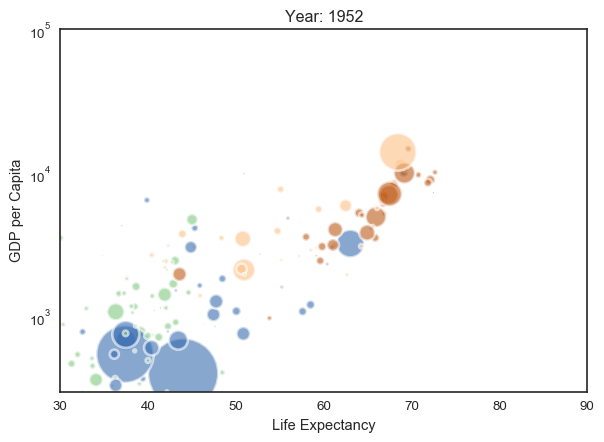

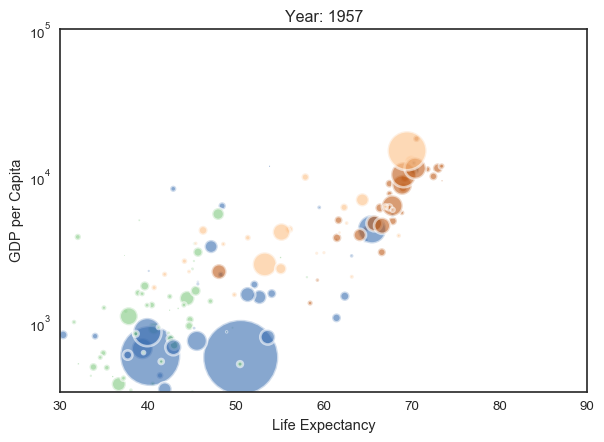

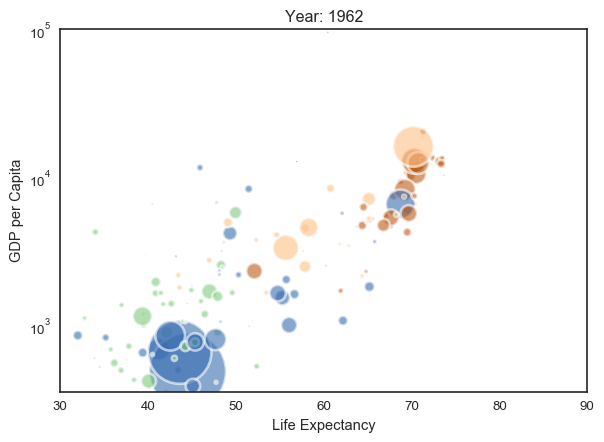

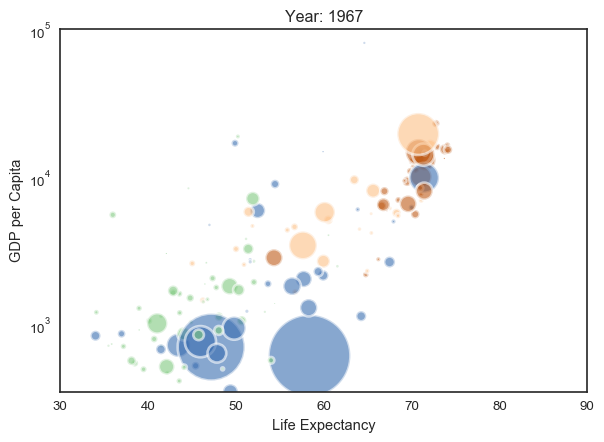

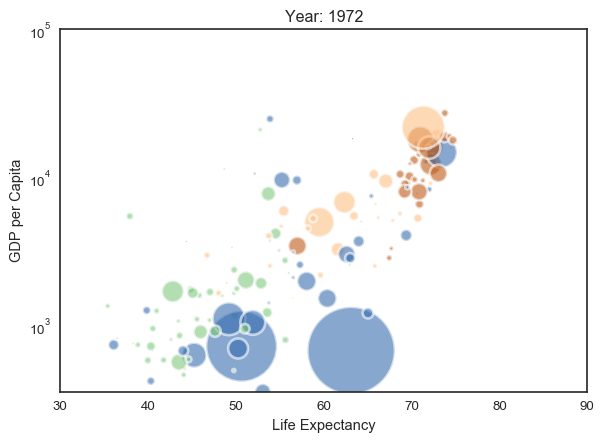

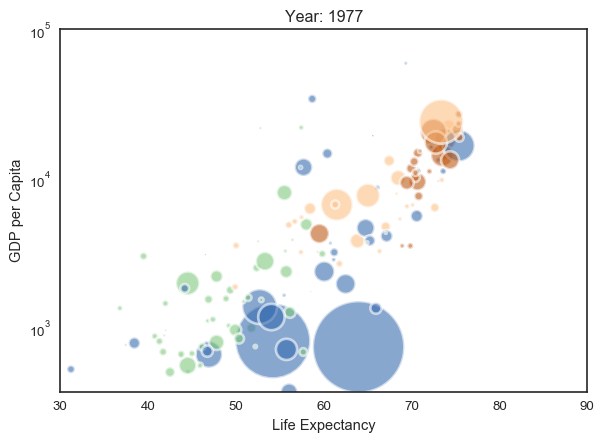

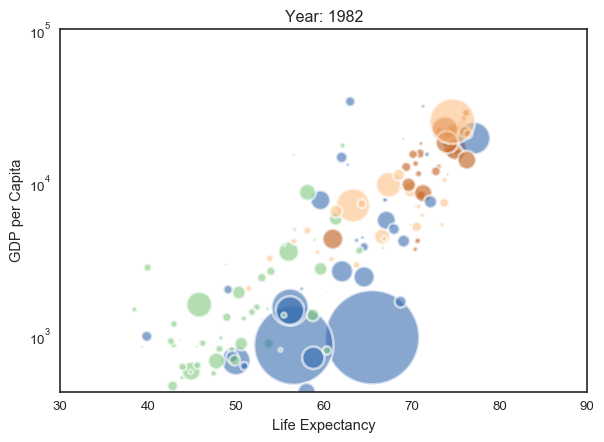

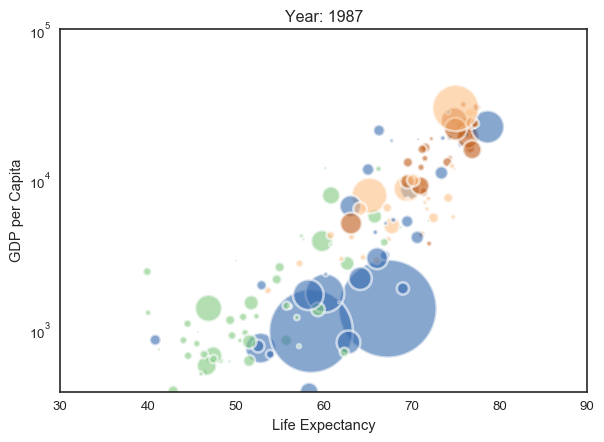

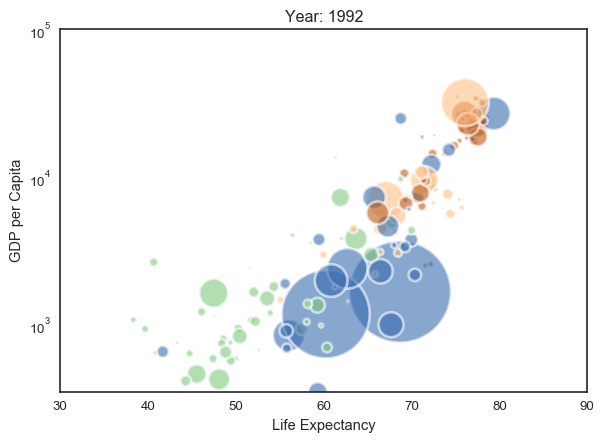

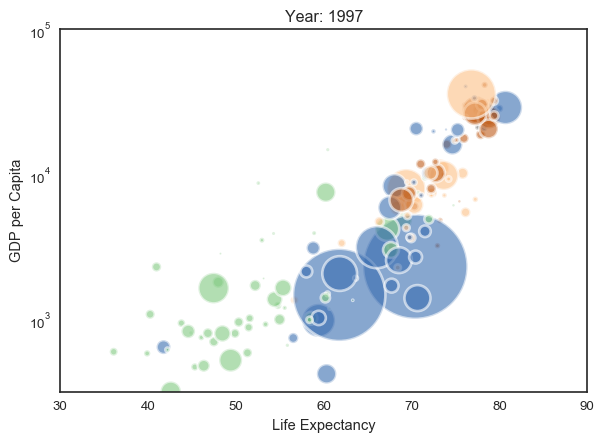

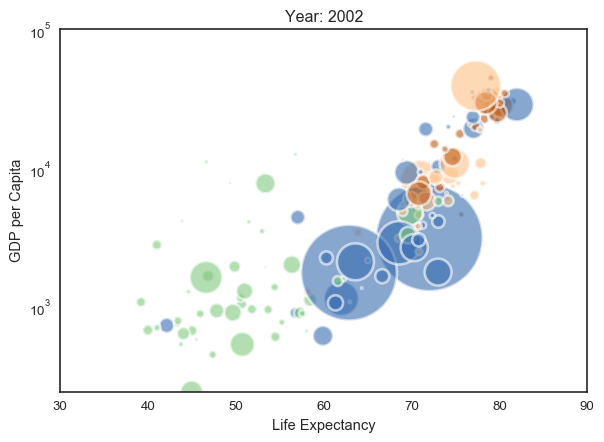

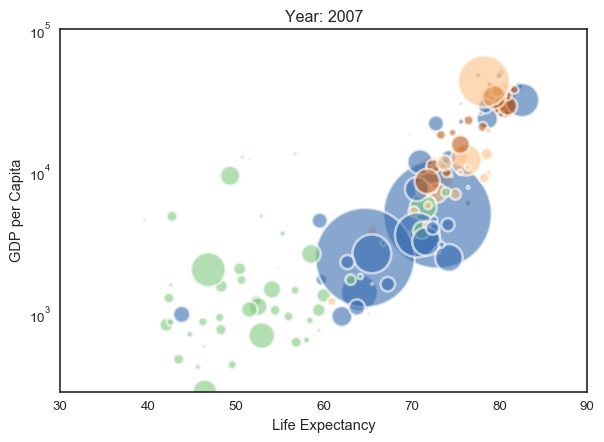

In [35]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("white")
import pandas as pd
my_dpi=96
 
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/gapminderData.csv'
data = pd.read_csv(url)
 
# And I need to transform my categorical column (continent) in a numerical value group1->1, group2->2...
data['continent']=pd.Categorical(data['continent'])
 
# For each year:
for i in data.year.unique():
 
    # initialize a figure
    fig = plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)

    # Change color with c and alpha. I map the color to the X axis value.
    tmp=data[ data.year == i ]
    plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2)

    # Add titles (main and on axis)
    plt.yscale('log')
    plt.xlabel("Life Expectancy")
    plt.ylabel("GDP per Capita")
    plt.title("Year: "+str(i) )
    plt.ylim(0,100000)
    plt.xlim(30, 90)

    # Save it
    filename='Gapminder_step'+str(i)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()
    
#convert -delay 80 Gapminder*.png animated_gapminder.gif
#http://www.imagemagick.org/discourse-server/viewtopic.php?t=28672
#convert 'input-%d.png[0-20]' output.gif

